# YOLO (You Only Look Once) Object Detection

Download these three files

1. yolov3.cfg (configuration files)  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
2. yolov3.weights (trained model to detect objects) https://pjreddie.com/media/files/yolov3.weights
3. coco.names (Dataset of 80 objects) https://github.com/pjreddie/darknet/blob/master/data/coco.names

In [16]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://www.goeduhub.com/?qa=blob&qa_blobid=1257949589874752501&ezimgfmt=rs:600x315/rscb1/ng:webp/ngcb1', width=800, height=800)

In [1]:
import numpy as np
import cv2  # pip install opencv-python
cv2.__version__

'4.5.2'

In [2]:
# Load Yolo
# dnn is deep neural network
net = cv2.dnn.readNet("../Unknown/yolov3.weights", "../Unknown/yolov3.cfg")  

classes = []   

# in classes you can specify objects that you want to detect 
# classes=['car','person','bicycle'] 

# Loading classes from coco file
with open("../Unknown/coco.names", "r") as f:      

    classes = [line.strip() for line in f.readlines()]    
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
# with output layer we get detection of objects.
layer_names = net.getLayerNames()

output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# The '3' is the channel (for RGB).
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Loading image

In [7]:
# Enter your image name here that you want to detect
# image from:   
# https://www.walmart.com/ip/Tribesigns-Rotating-Computer-Desk-5-Shelves-Bookshelf-Vintage-Rustic-L-Shaped-Corner-Storage-Reversible-Office-Study-Table-Writing-Wheels-Home/462032191
img = cv2.imread("../Unknown/test_folder/office-image.jpeg") 
#OPTIONAL
# Resizing the image. None refers to no fixed size. fx and fy are width and height .
#img = cv2.resize(img, None, fx=0.5, fy=0.5)

height, width, channels = img.shape
cv2.imshow("Test Image", img)
# waiting any key stroke toclose the window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Detecting objects
# True refers to converting into rgb format since opencv uses bgr.
#  first have to convert it into blob. Blob extracts the features from the image. (416,416) is the standard size. 
# scale factor: 1/255 = 0.00392
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)  

# Showing informations on the screen
for b in blob:
    for n, img_blob in enumerate(b):
        cv2.imshow(str(n), img_blob)
        cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# Passing blob image to yolo algo in network
net.setInput(blob)  


# Giving network to output layer for final result.
outs = net.forward(output_layers)  

In [10]:
class_ids = []

confidences = []

boxes = []

for out in outs:

    for detection in out:

        scores = detection[5:]

        class_id = np.argmax(scores)

        confidence = scores[class_id]

        if confidence > 0.5: #  confidence>0.5 (50%), then the object will be detected

            # Object detected

            center_x = int(detection[0] * width)

            center_y = int(detection[1] * height)

            w = int(detection[2] * width)

            h = int(detection[3] * height)

            # Rectangle coordinates

            x = int(center_x - w / 2)

            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])

            confidences.append(float(confidence))

            class_ids.append(class_id)

In [11]:
# NMSBoxes(bboxes, scores, score_threshold, nms_threshold, eta=None, top_k=None)
#     bboxes a set of bounding boxes to apply NMS.
#     scores a set of corresponding confidences.
#     score_threshold a threshold used to filter boxes by score.
#     nms_threshold a threshold used in non maximum suppression.
#     indices the kept indices of bboxes after NMS.
#     eta a coefficient in adaptive threshold formula: \f$nms\_threshold_{i+1}=eta\cdot nms\_threshold_i\f$.
#     top_k if `>0`, keep at most @p top_k picked indices.
#
#  If nmsThreshold is set too low, e.g. 0.1, we might not detect overlapping objects of same or different classes. 
#  But if it is set too high e.g. 1, then we get multiple boxes for the same object.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) 
#print(indexes)

font = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):

    if i in indexes:

        x, y, w, h = boxes[i]

        label = str(classes[class_ids[i]])

        color = colors[i]
        # Draw rectangle around boxes. '2' is the width of box.
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2) 

        # Text in Box to label the object
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

cv2.imshow("Image", img)
# waiting any key stroke toclose the window
cv2.waitKey(0)
cv2.destroyAllWindows()

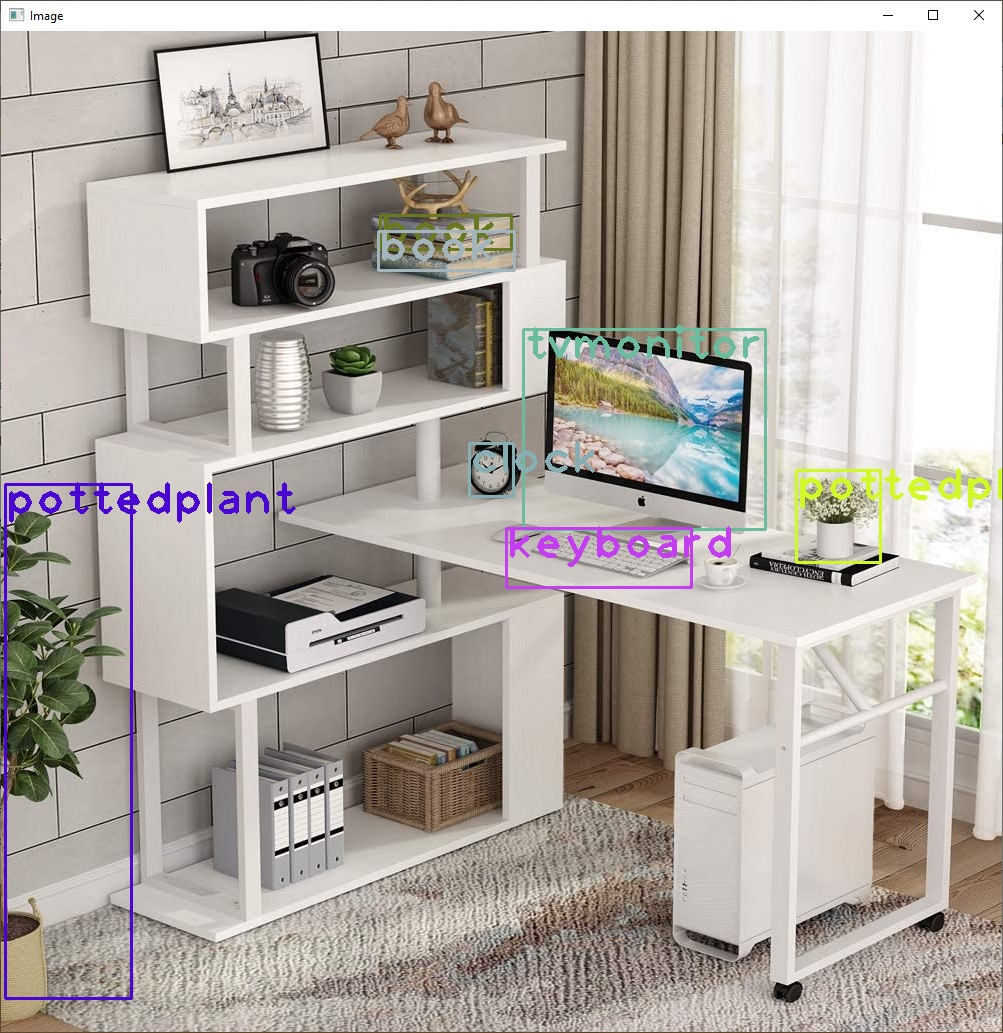

In [32]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/result5.jpg') 

## YOLO in Video

In [4]:
def classify(frame):
    height, width, channels = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids = []

    confidences = []

    boxes = []

    for out in outs:

        for detection in out:

            scores = detection[5:]

            class_id = np.argmax(scores)

            confidence = scores[class_id]

            if confidence > 0.25:

                # Object detected

                center_x = int(detection[0] * width)

                center_y = int(detection[1] * height)

                w = int(detection[2] * width)

                h = int(detection[3] * height)

                # Rectangle coordinates

                x = int(center_x - w / 2)

                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])

                confidences.append(float(confidence))

                class_ids.append(class_id)

                indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):

        if i in indexes:

            x, y, w, h = boxes[i]

            label = str(classes[class_ids[i]])

            color = colors[i]

            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

            cv2.putText(frame, label, (x, y+30), font, 2, color, 2) 
    return frame

In [6]:
import time
font = cv2.FONT_HERSHEY_PLAIN
#cap = cv2.VideoCapture(0) # for webcam
# video capture from : https://www.youtube.com/watch?v=8evDJtPFTp0
cap = cv2.VideoCapture('../Unknown/test_folder/home.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video file")
    
count=0
while cap.isOpened():
    count +=1    
    # Capture frame-by-frame
    ret, frame = cap.read()
    try:
        frame= cv2.resize(frame, None, fx=.5,fy=0.5, interpolation = cv2.INTER_AREA)
    except Exception as e :
        print(str(e))
        break
    path = 'test_folder\\cap\\imageframe' + str(count) + '.jpg'
    if count%30 ==0:   # capture image from every 30 frames
            frame=classify(frame)
            cv2.imwrite(path, frame)
            img=cv2.imread(path)
            time.sleep(2)
    cv2.imshow("Live cam", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): # press 'q' to release the window.
        break

cap.release()
#cv2.waitKey(1)
cv2.destroyAllWindows()
cap.release()


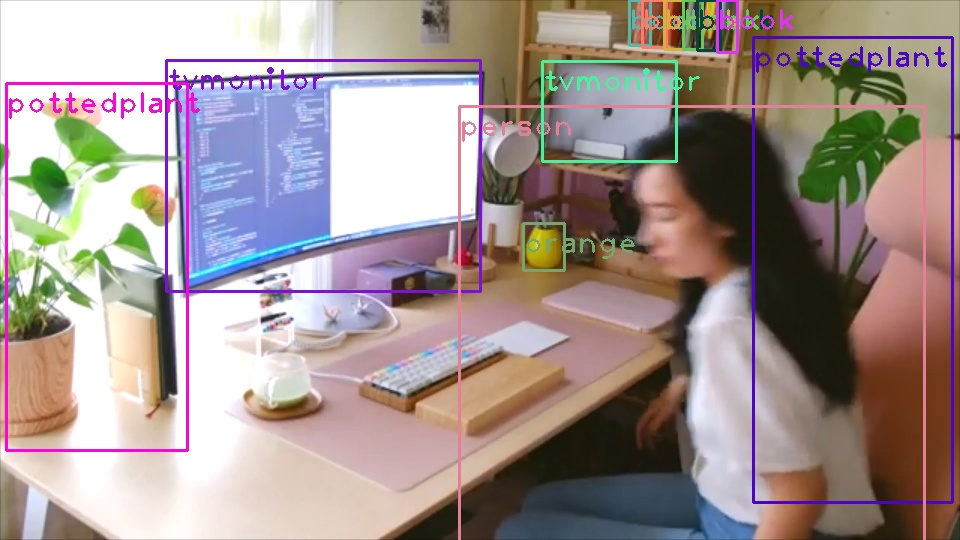

In [12]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/cap/imageframe150.jpg') 

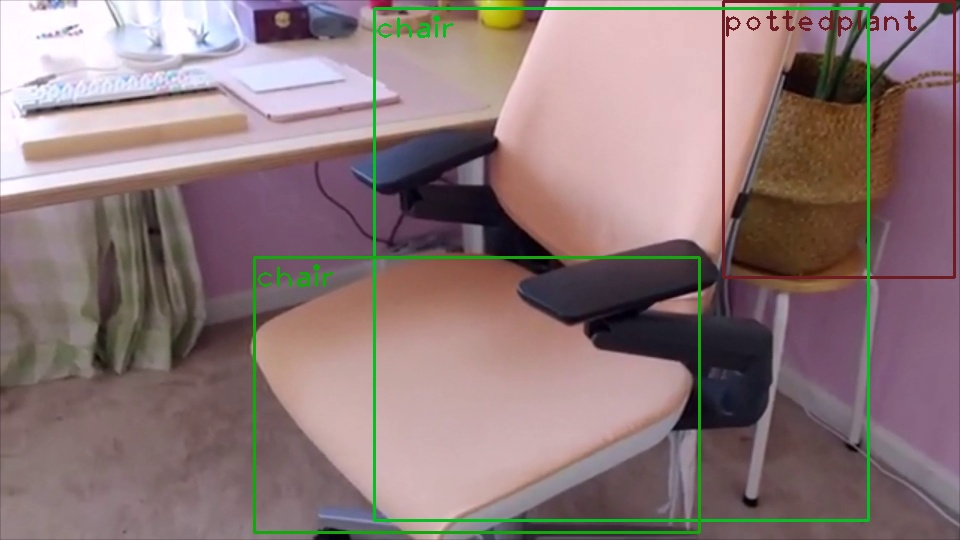

In [13]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/cap/imageframe450.jpg') 

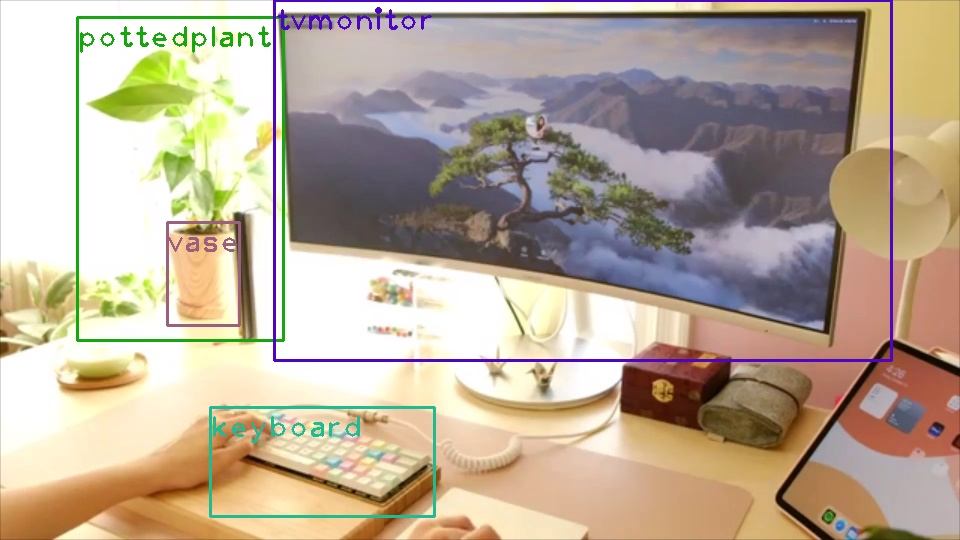

In [14]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/cap/imageframe900.jpg') 

#### Reference:
    https://www.goeduhub.com/9736/object-detection-using-yolo-algorithm